In [30]:
import pandas as pd
df = pd.read_csv("/Users/aryanthakur/Downloads/MACosmetics_Preprocessed.csv")
df.head()

,Tweets,Polarity,Label,Label_M
0,bendy concealer lip liner chestnut lippy lady ...,0.70,positive,positive
1,let boycott begin,0.00,neutral,negative
2,need try get sleep tonight I m go leave morning,0.00,neutral,neutral
3,ok except one we have not follow standard,0.25,positive,positive
4,read lil dylan act career tank agent writer fr...,-0.50,negative,negative


In [31]:
df.dropna(subset=['Tweets'], inplace=True)
print(df['Tweets'].isna().sum())

0


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tweets'])

print(tfidf_matrix.shape)

(2358, 1779)


In [33]:


tfidf = TfidfVectorizer(max_df=0.8, min_df=2)

tfidf_matrix = tfidf.fit_transform(df['Tweets'][:20])

tfidf_array = tfidf_matrix.toarray()
print(tfidf_array)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.59610181 0.         0.
  0.         0.         0.         0.         0.59610181 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.53788964 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         

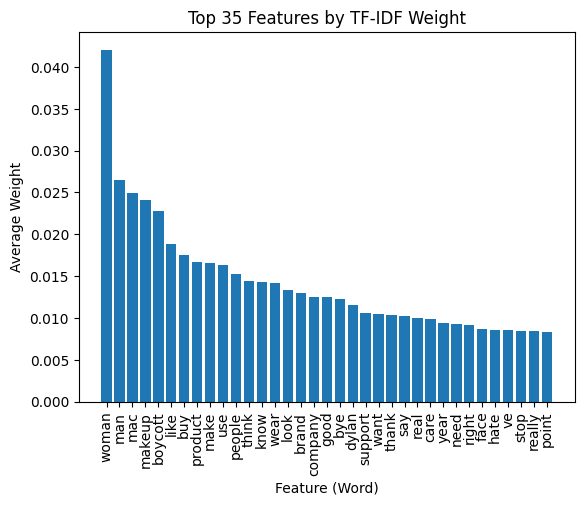

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(df['Tweets'])

feature_names = tfidf_vectorizer.get_feature_names_out()

doc_weights = tfidf_matrix.toarray()

avg_weights = tfidf_matrix.mean(axis=0).tolist()[0]

feature_weights = dict(zip(feature_names, avg_weights))

sorted_features = sorted(feature_weights.items(), key=lambda x: x[1], reverse=True)

top_features = sorted_features[:35]

plt.bar(range(len(top_features)), [x[1] for x in top_features], align='center')
plt.xticks(range(len(top_features)), [x[0] for x in top_features], rotation=90)
plt.xlabel('Feature (Word)')
plt.ylabel('Average Weight')
plt.title('Top 35 Features by TF-IDF Weight')
plt.show()